# Keras basics

## Import packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Keras functional API

### Example model

Define the input layer.

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
inputs.shape

TensorShape([None, 784])

In [4]:
inputs.dtype

tf.float32

Create a new layer.

In [5]:
x = layers.Dense(10, activation='relu')(inputs)

Add another layer and finally an output layer.

In [6]:
x = layers.Dense(10, activation='relu')(x)
outputs = layers.Dense(1)(x)

Create the model.

In [7]:
model = keras.Model(inputs=inputs, outputs=outputs, name='example_model')

In [8]:
model.summary()

Model: "example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 7,971
Trainable params: 7,971
Non-trainable params: 0
_________________________________________________________________


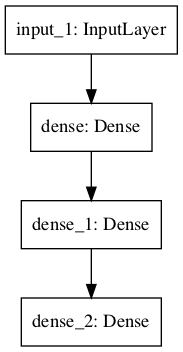

In [9]:
keras.utils.plot_model(model)

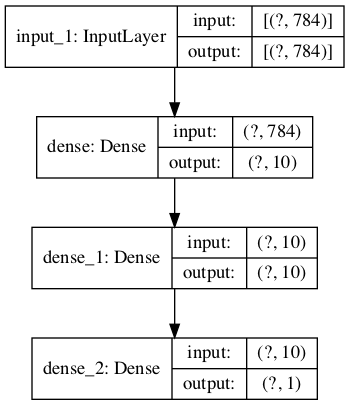

In [10]:
keras.utils.plot_model(model, show_shapes=True)

Putting it all together.

In [11]:
inputs = layers.Input(shape=(784,))
x = layers.Dense(10, activation='relu')(inputs)
x = layers.Dense(10, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='example_model')

## Training, evaluation, and inference

Upload and reshape the data.

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [13]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

Compile the model.

In [24]:
model.compile(loss='mean_absolute_error',
              optimizer=keras.optimizers.RMSprop(),
              metrics=["accuracy"],)

Fit the model to the training data.

In [26]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2, verbose=0)

Evaluate the model.

In [28]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.6059 - accuracy: 0.1744
Test loss: 0.6058921813964844
Test accuracy: 0.17440000176429749


Putting it all together.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='mean_absolute_error',
              optimizer=keras.optimizers.RMSprop(),
              metrics=["accuracy"],)

history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2, verbose=0)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])